## Modelado con base primigea con similitud de coseno

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Carga de base
netflix_titles_df = pd.read_csv('netflix_titles.csv')

# Rellenado de valores faltantes
netflix_titles_df['director'] = netflix_titles_df['director'].fillna('Unknown director')
netflix_titles_df['country'] = netflix_titles_df['country'].fillna('Unknown country')
netflix_titles_df['rating'] = netflix_titles_df['rating'].fillna('Unknown rating')
netflix_titles_df['duration'] = netflix_titles_df['duration'].fillna('Unknown duration')
netflix_titles_df['description'] = netflix_titles_df['description'].fillna('Unknown description')
netflix_titles_df['listed_in'] = netflix_titles_df['listed_in'].fillna('Unknown genre')

# Eliminar valores faltantes
netflix_titles_df.dropna(subset=['date_added'], inplace=True)

# Combinar columnas para TF-IDF vectorization
combined_features = netflix_titles_df['description'] + " " + netflix_titles_df['listed_in'] + " " + \
                    netflix_titles_df['director'] + " " + netflix_titles_df['country']

# Aplicación TF-IDF a la columna generada
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_combined = tfidf_vectorizer.fit_transform(combined_features)

# Tamaño de la base generada
tfidf_matrix_combined.shape

(6223, 19998)

In [8]:
netflix_titles_df.reset_index(drop=True, inplace=True)


In [9]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6223 entries, 0 to 6222
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6223 non-null   int64 
 1   type          6223 non-null   object
 2   title         6223 non-null   object
 3   director      6223 non-null   object
 4   cast          5654 non-null   object
 5   country       6223 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6223 non-null   int64 
 8   rating        6223 non-null   object
 9   duration      6223 non-null   object
 10  listed_in     6223 non-null   object
 11  description   6223 non-null   object
dtypes: int64(2), object(10)
memory usage: 583.5+ KB


In [10]:
netflix_titles_df.describe()

,show_id,release_year
count,6.223000e+03,6223.000000
mean,7.670879e+07,2013.362205
std,1.095015e+07,8.816695
min,2.477470e+05,1925.000000
25%,8.003654e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024498e+07,2018.000000
max,8.123573e+07,2020.000000


In [60]:
def generate_recommendations(tfidf_matrix, df, input_title, top_n=10):
    input_title_index = df[df['title'] == input_title].index
    if len(input_title_index) == 0:
        return "No se encontraron resultados similares"
    
    input_title_index = input_title_index[0]
    cosine_similarities = cosine_similarity(tfidf_matrix[input_title_index], tfidf_matrix)
    similar_shows = list(enumerate(cosine_similarities[0]))
    similar_shows = sorted(similar_shows, key=lambda x: x[1], reverse=True)
    top_similar_shows = similar_shows[1:top_n+1]
    result = {}
    for i, (index, similarity) in enumerate(top_similar_shows, 1):
        similar_show_title = df.iloc[index]['title']
        result[f"Recomendación #{i}"] = similar_show_title
    return result

# Generador de recomendaciones con el titulo solicitado
input_title=input("¿Que titulo busca? ")

recomendaciones= generate_recommendations(tfidf_matrix_combined, netflix_titles_df, input_title) 
print('Recomendaciones con base a ' + input_title + ':')
recomendaciones


¿Que titulo busca?  Saint Seiya


Recomendaciones con base a Saint Seiya:


{'Recomendación #1': '\u200bSAINT SEIYA: Knights of the Zodiac',
 'Recomendación #2': 'Saint Seiya: The Lost Canvas',
 'Recomendación #3': 'Beyblade: Metal Fusion',
 'Recomendación #4': 'Glitter Force Doki Doki',
 'Recomendación #5': 'Puella Magi Madoka Magica',
 'Recomendación #6': 'Glitter Force',
 'Recomendación #7': 'Charmed',
 'Recomendación #8': 'Magi: The Labyrinth of Magic',
 'Recomendación #9': 'K',
 'Recomendación #10': 'Levius'}

## Modelado con base ampliada (puntuaciones) con similitud de coseno y coloborativo

In [15]:
# Cargando el nuevo archivo CSV
new_dataset_path = 'datos_expandidos_actualizados.csv'
new_dataset_df = pd.read_csv(new_dataset_path)

# Visualizando las primeras filas del dataset
new_dataset_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,costumer,rate,new_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Anabel del Bellido,5,Bolivia
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Jimena Martina Escudero Boix,4,Nicaragua
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Américo Grau Jordá,1,Nicaragua
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Lilia Ayala,2,Argentina
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Basilio Zorrilla Jover,2,Guatemala


In [16]:
df_cleaned=new_dataset_df[new_dataset_df['country']!='Unknown country']

In [18]:
new_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61649 entries, 0 to 61648
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       61649 non-null  object
 1   type          61649 non-null  object
 2   title         61649 non-null  object
 3   director      43211 non-null  object
 4   cast          55874 non-null  object
 5   country       55832 non-null  object
 6   date_added    61579 non-null  object
 7   release_year  61649 non-null  int64 
 8   rating        61621 non-null  object
 9   duration      61628 non-null  object
 10  listed_in     61649 non-null  object
 11  description   61649 non-null  object
 12  costumer      61649 non-null  object
 13  rate          61649 non-null  int64 
 14  new_country   61649 non-null  object
dtypes: int64(2), object(13)
memory usage: 7.1+ MB


In [19]:
new_dataset_df.describe()

,release_year,rate
count,61649.000000,61649.000000
mean,2014.180198,3.009376
std,8.818883,1.410979
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,3.000000
75%,2019.000000,4.000000
max,2021.000000,5.000000


In [20]:
top_10_countries=df_cleaned['country'].value_counts().iloc[:10]
top_10_countries

country
United States     19726
India              6804
United Kingdom     2933
Japan              1715
South Korea        1393
Canada             1267
Spain              1015
France              868
Mexico              770
Egypt               742
Name: count, dtype: int64

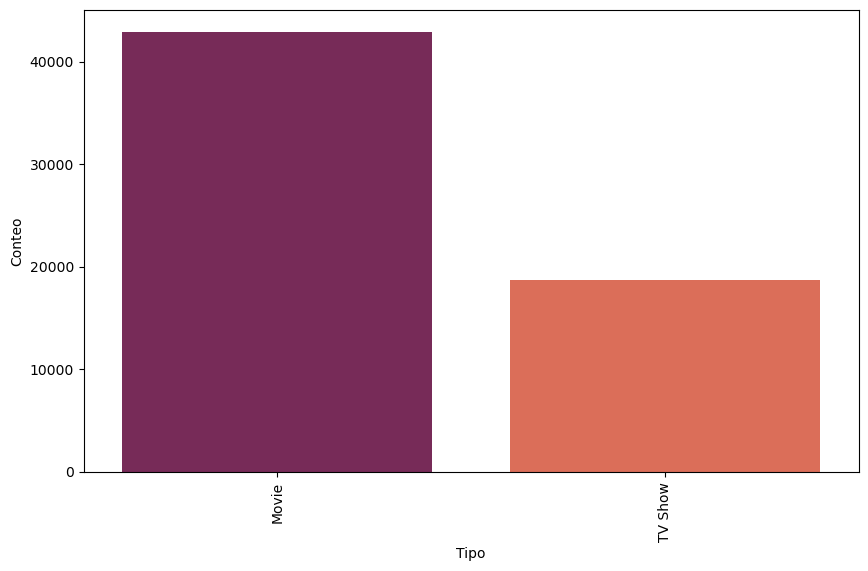

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=new_dataset_df,x='type', palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Tipo')
plt.ylabel('Conteo')
plt.show()

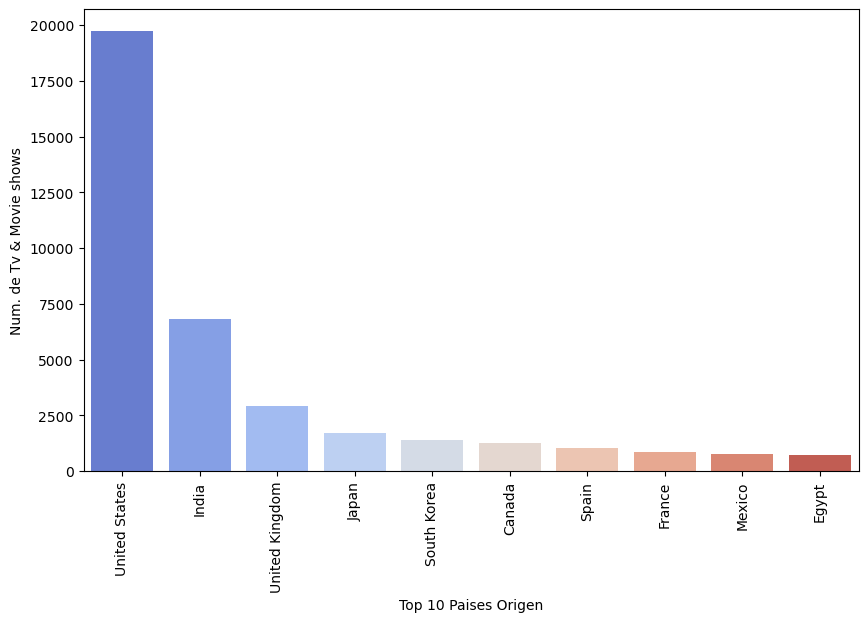

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_dataset_df[new_dataset_df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Top 10 Paises Origen')
plt.ylabel('Num. de Tv & Movie shows')
plt.show()

print('')

In [31]:
top_10_countries_user=new_dataset_df['new_country'].value_counts().iloc[:10]
top_10_countries_user

new_country
Brasil                  3193
Costa Rica              3191
República Dominicana    3157
Cuba                    3147
Panamá                  3132
Perú                    3122
Uruguay                 3119
Colombia                3110
El Salvador             3103
Ecuador                 3090
Name: count, dtype: int64

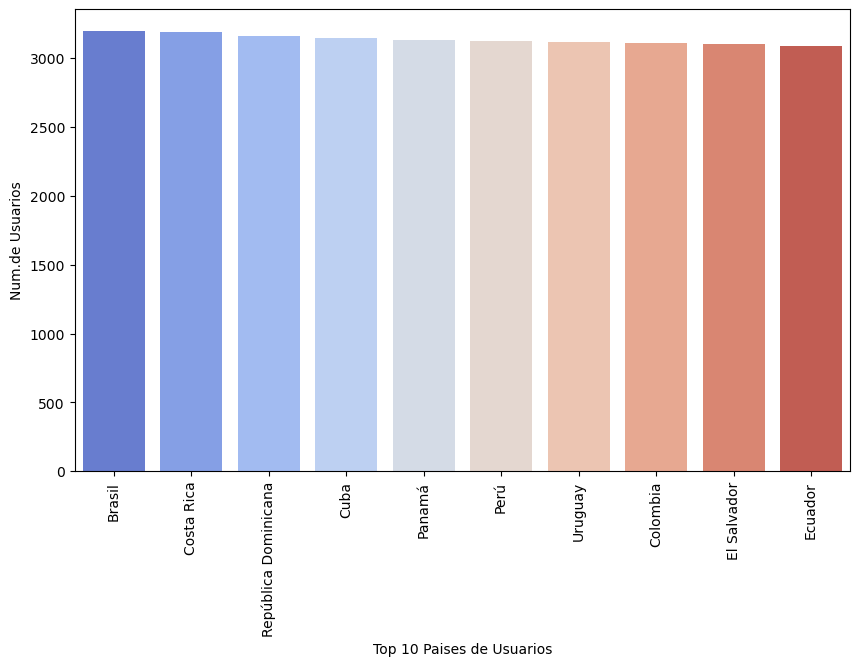

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_dataset_df[new_dataset_df['new_country'].isin(top_10_countries_user.index)],x='new_country',order=top_10_countries_user.index, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Top 10 Paises de Usuarios')
plt.ylabel('Num.de Usuarios')
plt.show()

print('')

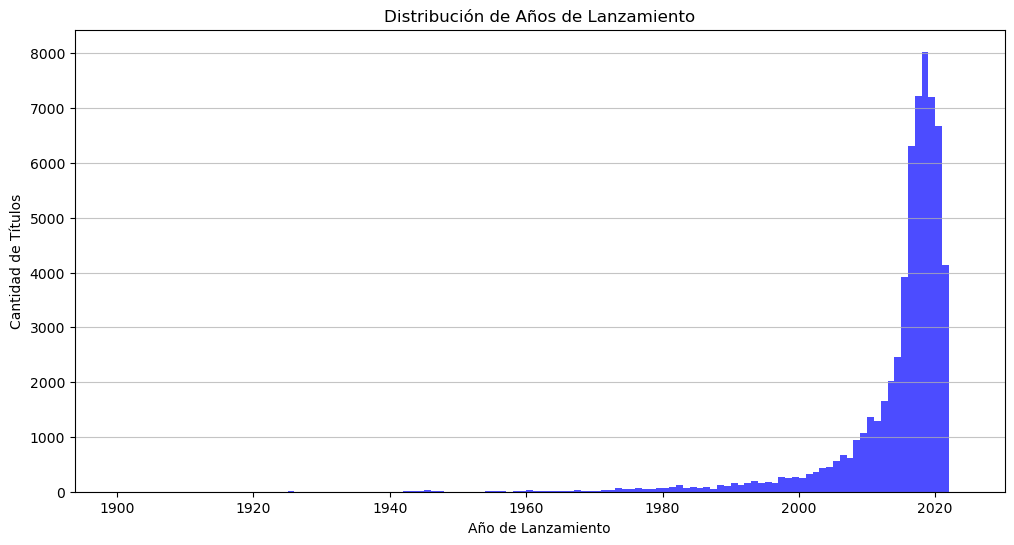

In [34]:
# Histograma de la columna 'release_year'
plt.figure(figsize=(12, 6))
plt.hist(new_dataset_df['release_year'], bins=range(1900, 2025), color='blue', alpha=0.7)
plt.title('Distribución de Años de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Títulos')
plt.grid(axis='y', alpha=0.75)
plt.show()

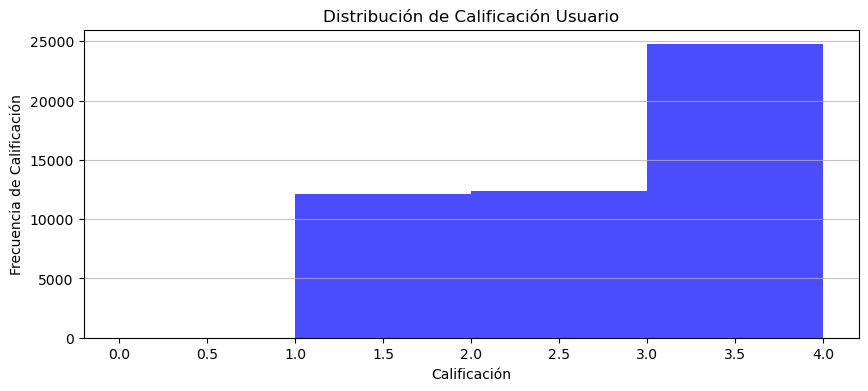

In [35]:
# Histograma de la columna 'release_year'
plt.figure(figsize=(10, 4))
plt.hist(new_dataset_df['rate'], bins=range(0, 5), color='blue', alpha=0.7)
plt.title('Distribución de Calificación Usuario')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia de Calificación')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [55]:
# Modelo 1: Recomendación Basada en Contenido

# Limpieza y preparación de datos
new_dataset_df['description'] = new_dataset_df['description'].fillna('Unknown description')
new_dataset_df['listed_in'] = new_dataset_df['listed_in'].fillna('Unknown genre')
new_dataset_df['director'] = new_dataset_df['director'].fillna('Unknown director')
new_dataset_df['country'] = new_dataset_df['country'].fillna('Unknown country')
# Eliminando duplicados
unique_titles_df = new_dataset_df.drop_duplicates(subset='title')

# Combinamos las columnas relevantes para la vectorización
combined_features_model_1 = unique_titles_df['description'] + " " + unique_titles_df['listed_in'] + " " + \
                            unique_titles_df['director'] + " " + unique_titles_df['country']


# Vectorización TF-IDF
tfidf_vectorizer_model_1 = TfidfVectorizer(stop_words='english')
tfidf_matrix_model_1 = tfidf_vectorizer_model_1.fit_transform(combined_features_model_1)

# Generamos recomendaciones para 'Naruto' usando el Modelo 1
input_title=input("¿Que titulo busca? ")
recommendations_model_1 = generate_recommendations(tfidf_matrix_model_1, unique_titles_df, input_title)


recomendaciones= generate_recommendations(tfidf_matrix_combined, netflix_titles_df, input_title) 
print('Recomendaciones con base a ' + input_title + ':')
recomendaciones


¿Que titulo busca?  Saint Seiya


Recomendaciones con base a Saint Seiya:


{'Recomendación #1': '\u200bSAINT SEIYA: Knights of the Zodiac',
 'Recomendación #2': 'Saint Seiya: The Lost Canvas',
 'Recomendación #3': 'Beyblade: Metal Fusion',
 'Recomendación #4': 'Glitter Force Doki Doki',
 'Recomendación #5': 'Puella Magi Madoka Magica',
 'Recomendación #6': 'Glitter Force',
 'Recomendación #7': 'Charmed'}

In [38]:
# Crear una matriz de usuario-ítem
ratings_matrix = new_dataset_df.pivot_table(index='costumer', columns='title', values='rate')

In [42]:
# Ejemplo: Filtrar ítems con al menos X valoraciones y usuarios con al menos Y valoraciones
min_item_ratings = 1
min_user_ratings = 1
filtered_df = new_dataset_df.groupby('title').filter(lambda x: len(x) >= min_item_ratings)
filtered_df = filtered_df.groupby('costumer').filter(lambda x: len(x) >= min_user_ratings)

# Crear la matriz de usuario-ítem después del filtrado
ratings_matrix = filtered_df.pivot_table(index='costumer', columns='title', values='rate').fillna(0)

In [44]:
ratings_matrix

title,#Alive,#AnneFrank - Parallel Stories,#FriendButMarried,#FriendButMarried 2,#Roxy,#Rucker50,#Selfie,#Selfie 69,#blackAF,#cats_the_mewvie,...,​Goli Soda 2,​Maj Rati ​​Keteki,​Mayurakshi,​SAINT SEIYA: Knights of the Zodiac,​​Kuch Bheege Alfaaz,忍者ハットリくん,海的儿子,마녀사냥,반드시 잡는다,최강전사 미니특공대 : 영웅의 탄생
costumer,,,,,,,,,,,,,,,,,,,,,
Aarón Adán,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aarón Alsina Salvador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aarón Anaya Borrego,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aarón Arnal Alberola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aarón Bayón Palomar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Úrsula de Rosa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Úrsula de Vilalta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Úrsula del Martin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
ratings_matrix.fillna(0, inplace=True)

In [48]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import numpy as np

# Convertir la matriz de usuario-ítem a una matriz dispersa
ratings_matrix_sparse = csr_matrix(ratings_matrix.values)

# Aplicar SVD a la matriz dispersa
U, sigma, Vt = svds(ratings_matrix_sparse, k=50)  # k es el número de factores latentes

# Convertir sigma a una matriz diagonal para su uso en predicciones
sigma = np.diag(sigma)


In [50]:
# Asegurarse de que sigma sea una matriz diagonal de la dimensión correcta
sigma_matrix = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(sigma_matrix, sigma)

# Calcular las puntuaciones predichas
predicted_ratings = np.dot(np.dot(U, sigma_matrix), Vt)

# Si es necesario, redondear las puntuaciones predichas para que coincidan con el rango de calificaciones original
 predicted_ratings = np.round(predicted_ratings)



IndentationError: unexpected indent (1074728219.py, line 9)

In [51]:
# Convertir las puntuaciones predichas en un DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns = ratings_matrix.columns, index=ratings_matrix.index)



NameError: name 'predicted_ratings' is not defined

In [52]:
def recommend_items(user_id, original_ratings_df, preds_df, num_recommendations):
   # Obtener y ordenar las puntuaciones predichas del usuario
    sorted_user_predictions = preds_df.loc[user_id].sort_values(ascending=False)

    # Obtener las valoraciones originales del usuario
    user_data = original_ratings_df[original_ratings_df.index == user_id]
    
    # Filtrar ítems que el usuario ya ha valorado
    user_predictions = sorted_user_predictions[~sorted_user_predictions.index.isin(user_data.columns)]
    
    # Obtener las recomendaciones más altas
    recommendations = user_predictions.head(num_recommendations)
    return recommendations

# Ejemplo: Generar 10 recomendaciones para un usuario específico
user_id = ratings_matrix.index[1000]  # Reemplazar con un ID de usuario específico
num_recommendations = 10
user_recommendations = recommend_items(user_id, ratings_matrix, predicted_ratings_df, num_recommendations)


NameError: name 'predicted_ratings_df' is not defined

In [17]:
#user_recommendations

In [18]:
# Filtrar filas donde hay al menos un valor mayor a cero en sus columnas
#filas_con_valoraciones = ratings_matrix[ratings_matrix > 0].any(axis=1)

# Aplicar este filtro a la matriz de ratings
#ratings_matrix_filtrada = ratings_matrix[filas_con_valoraciones]
